In [3]:
import cv2
# Load the input image (grayscale)
image = cv2.imread('/ct.jpg', cv2.IMREAD_GRAYSCALE)


## Histogram Equalization in CT Scan

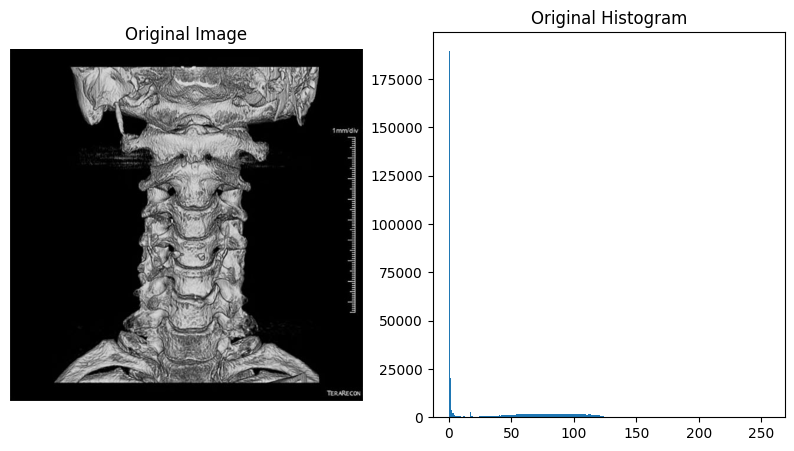

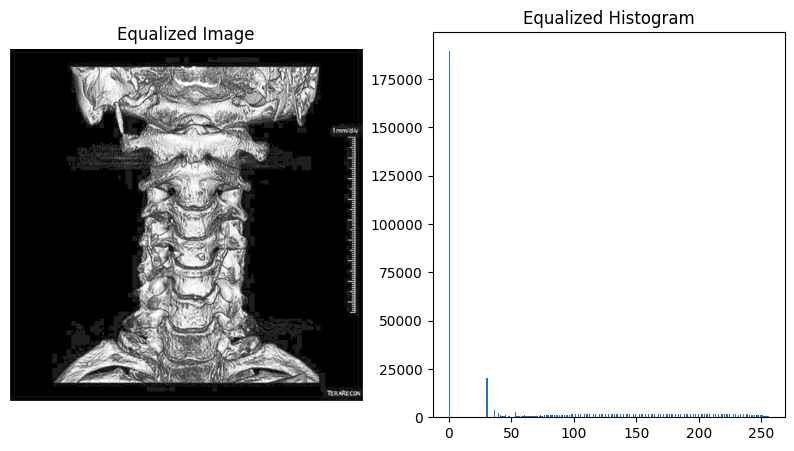

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply Histogram Equalization using OpenCV
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images side by side
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Original image histogram
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Original Histogram')


plt.show()

# Display the histograms of the original and equalized images
plt.figure(figsize=(10,5))

# Equalized image
plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')


# Equalized image histogram
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')

plt.show()


## Gaussian Blurring (Smoothing)

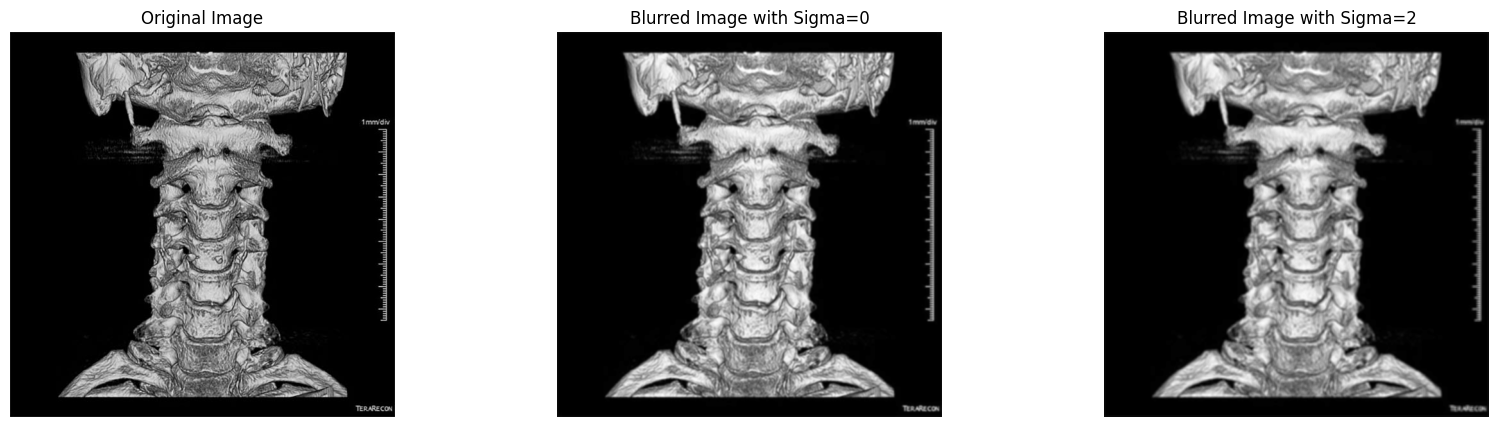

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image (grayscale)
image = cv2.imread('/ct.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image0 = cv2.GaussianBlur(image, (5, 5), sigmaX=0)
blurred_image1 = cv2.GaussianBlur(image, (5, 5), sigmaX=1)
blurred_image2 = cv2.GaussianBlur(image, (5, 5), sigmaX=2)

# Display the original and blurred images side by side
plt.figure(figsize=(20, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Blurred image 0
plt.subplot(1, 3, 2)
plt.imshow(blurred_image0, cmap='gray')
plt.title('Blurred Image with Sigma=0')
plt.axis('off')

# Blurred image 2
plt.subplot(1, 3, 3)
plt.imshow(blurred_image2, cmap='gray')
plt.title('Blurred Image with Sigma=2')
plt.axis('off')

plt.show()



## Wavelet Transformation

In [6]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.6 MB/s eta 0:00:00


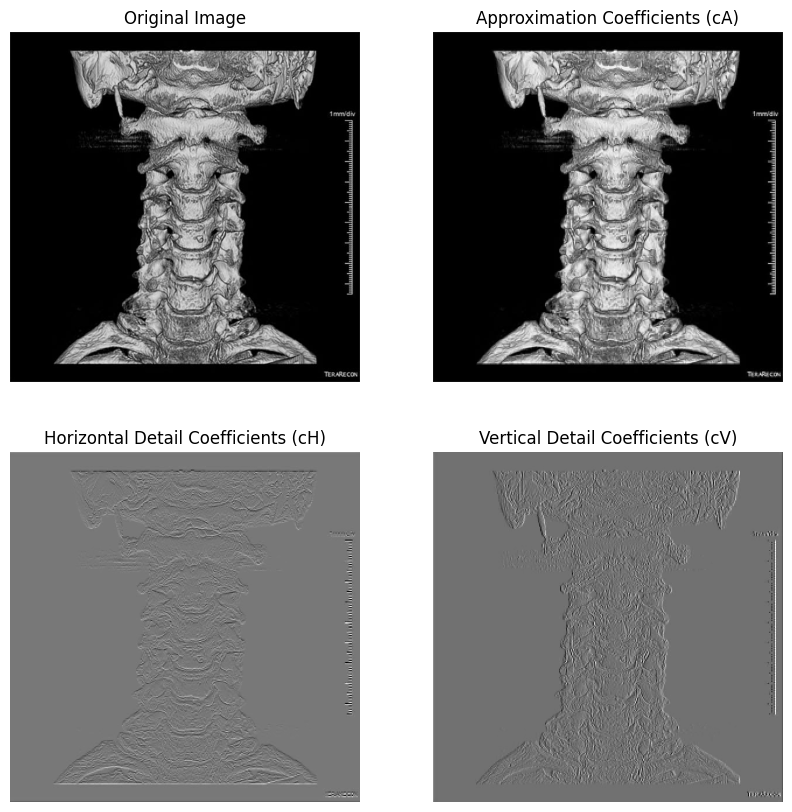

In [7]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Load the input image (grayscale)
image = cv2.imread('/ct.jpg', cv2.IMREAD_GRAYSCALE)

# Perform Discrete Wavelet Transform
coeffs = pywt.dwt2(image, 'haar')  # You can choose different wavelets like 'db1', 'sym2', etc.
cA, (cH, cV, cD) = coeffs  # cA = Approximation, cH = Horizontal details, cV = Vertical details, cD = Diagonal details

# Display the original and wavelet-transformed images
plt.figure(figsize=(10, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Approximation coefficients
plt.subplot(2, 2, 2)
plt.imshow(cA, cmap='gray')
plt.title('Approximation Coefficients (cA)')
plt.axis('off')

# Horizontal detail coefficients
plt.subplot(2, 2, 3)
plt.imshow(cH, cmap='gray')
plt.title('Horizontal Detail Coefficients (cH)')
plt.axis('off')

# Vertical detail coefficients
plt.subplot(2, 2, 4)
plt.imshow(cV, cmap='gray')
plt.title('Vertical Detail Coefficients (cV)')
plt.axis('off')

plt.show()


## Fourier Transform

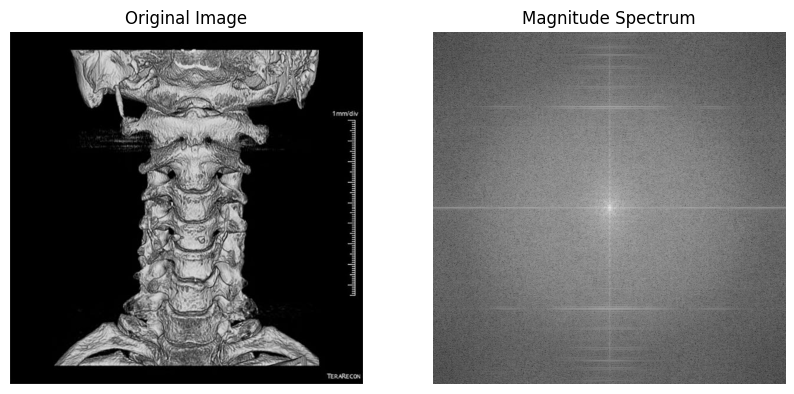

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image (grayscale)
image = cv2.imread('/ct.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the 2D Fourier Transform
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)  # Shift the zero frequency component to the center

# Compute the magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Display the original image and its Fourier Transform
plt.figure(figsize=(10, 10))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Magnitude spectrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()


## Edge Detection and Enhancement

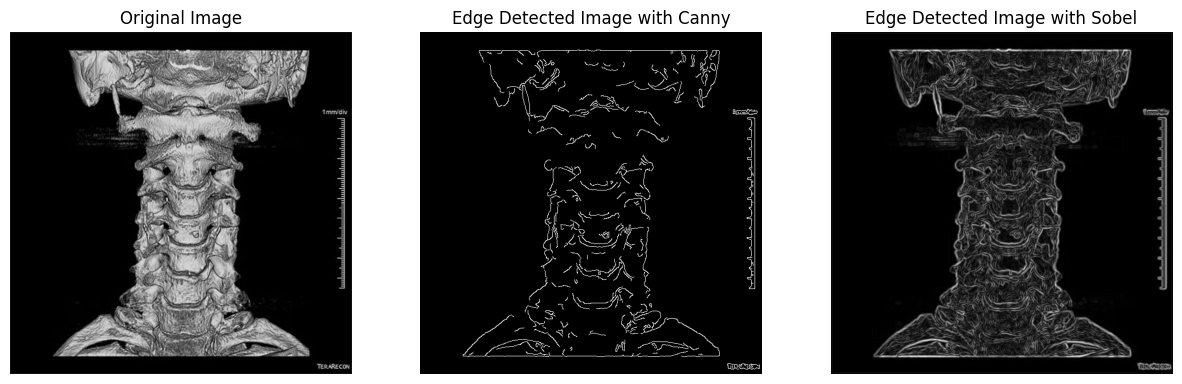

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image (grayscale)
image = cv2.imread('/ct.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges_c = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

# Apply Sobel operator to detect edges in both x and y directions
sobel_x = cv2.Sobel(blurred_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(blurred_image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)  # Gradient in y direction

# Calculate the gradient magnitude
edges_s = cv2.magnitude(sobel_x, sobel_y)

# Display the original and edge-detected images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 3, 2)
plt.imshow(edges_c, cmap='gray')
plt.title('Edge Detected Image with Canny')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 3, 3)
plt.imshow(edges_s, cmap='gray')
plt.title('Edge Detected Image with Sobel')
plt.axis('off')

plt.show()


## Denoising

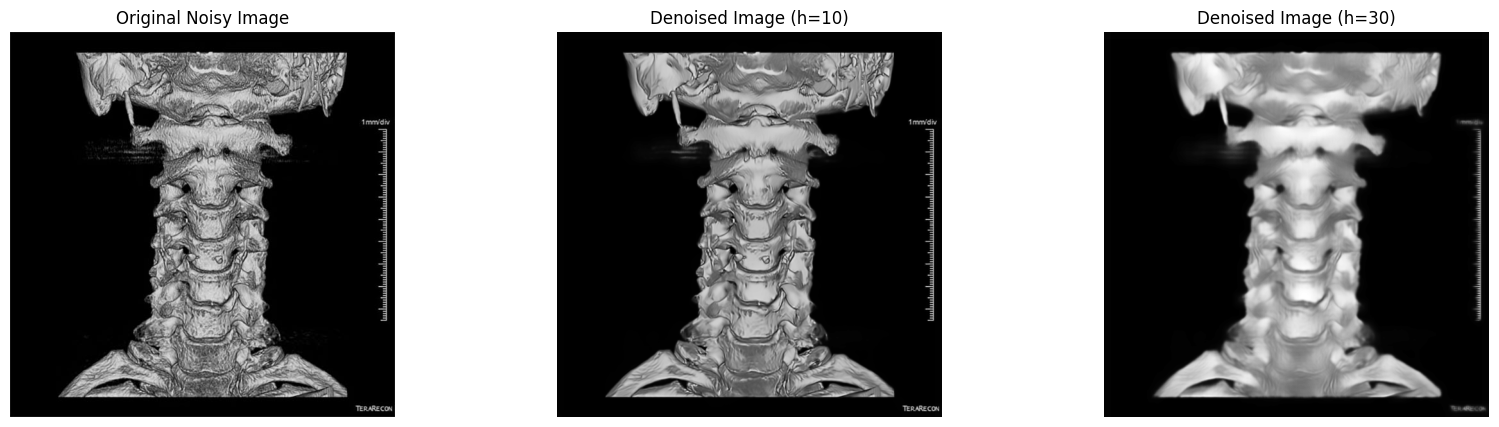

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image (grayscale)
image = cv2.imread('/ct.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Non-Local Means Denoising
denoised_image0 = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)
denoised_image1 = cv2.fastNlMeansDenoising(image, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Display the original and denoised images side by side
plt.figure(figsize=(20, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

# Denoised image with h=10
plt.subplot(1, 3, 2)
plt.imshow(denoised_image0, cmap='gray')
plt.title('Denoised Image (h=10)')
plt.axis('off')

# Denoised image with h=30
plt.subplot(1, 3, 3)
plt.imshow(denoised_image1, cmap='gray')
plt.title('Denoised Image (h=30)')
plt.axis('off')

plt.show()


##Sharpening

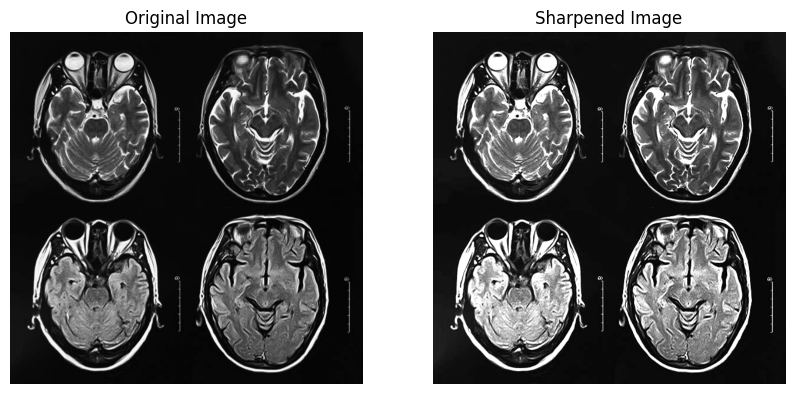

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image (grayscale)
image = cv2.imread('/mri.jpg', cv2.IMREAD_GRAYSCALE)

# Create a Gaussian blurred version of the image
blurred_image = cv2.GaussianBlur(image, (5, 5), sigmaX=1)

# Perform unsharp masking by subtracting the blurred image from the original
sharpened_image = cv2.addWeighted(image, 2.0, blurred_image, -0.5, 0)

# Display the original and sharpened images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()


## Morphological Operations

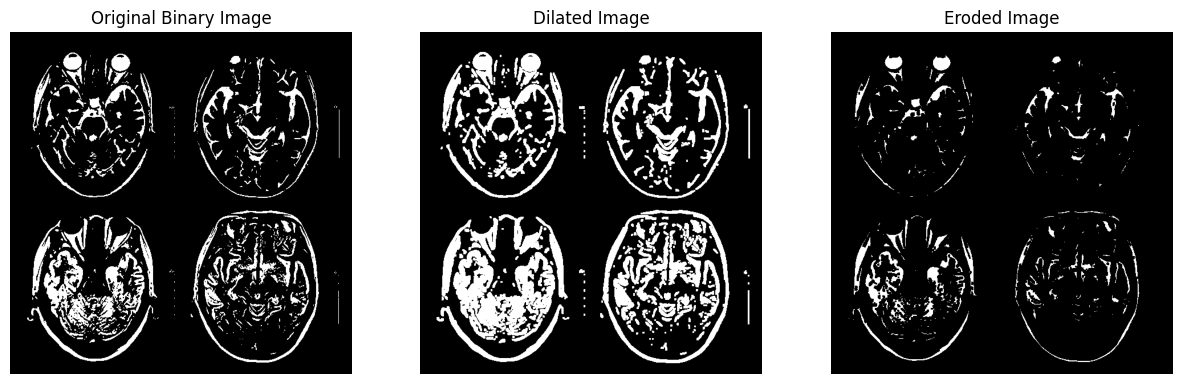

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image (grayscale)
image = cv2.imread('/mri.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Create a structuring element (kernel)
kernel = np.ones((3, 3), np.uint8)

# Apply Dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Apply Erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Display the original and processed images side by side
plt.figure(figsize=(15, 5))

# Original binary image
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

# Dilated image
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Eroded image
plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.show()


## Background Suppression with Image Subtraction

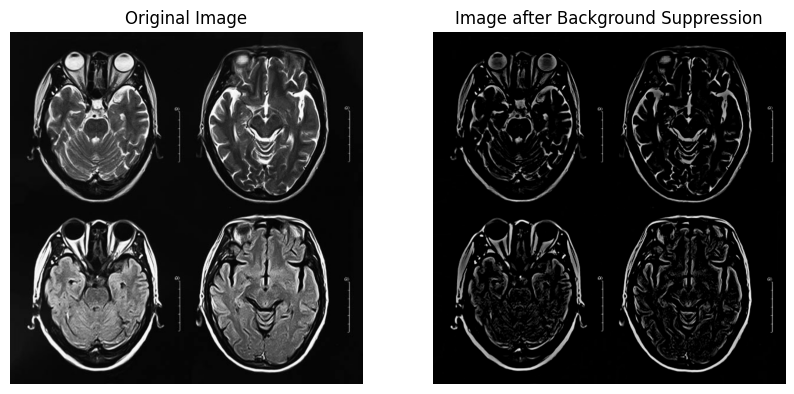

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def background_suppression(image):

    # Apply Gaussian blur to create a background estimate
    background_estimate = cv2.GaussianBlur(image, (21, 21), 15)

    # Subtract the background estimate from the original image
    suppressed_image = cv2.subtract(image, background_estimate)

    # Normalize the output image to the range 0-255
    suppressed_image = cv2.normalize(suppressed_image, None, 0, 255, cv2.NORM_MINMAX)

    return suppressed_image

# Load the input image (grayscale)
image = cv2.imread('/mri.jpg', cv2.IMREAD_GRAYSCALE)

# Perform background suppression
suppressed_image = background_suppression(image)

# Display the original and suppressed images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Suppressed image
plt.subplot(1, 2, 2)
plt.imshow(suppressed_image, cmap='gray')
plt.title('Image after Background Suppression')
plt.axis('off')

plt.show()
